In [1]:
import findspark
findspark.init()
import pyspark
sc = pyspark.SparkContext(appName="HR")
 
print sc # Not required 

# if we shut down the Notebook Kernel the Pyspark Context also shuts down = Not the ideal way to do the same though!!

In [2]:
## Dhankar >>
# Converted CSV to TSV 
# Now importing data from TSV 
# raw_d == the SPARK RDD Object
# Print out top 15 Rows 

raw_d = sc.textFile("hr.tsv")

# 
# In the above line of Code - actual Loading of CSV in RDD is Not yet Done 
# Its Done LAZILY - "as and when ABOSULUTELY required" as below - 
#

raw_d.take(3) 


[u'Age\tAttrition\tBusinessTravel\tDailyRate\tDepartment\tDistanceFromHome\tEducation\tEducationField\tEmployeeCount\tEmployeeNumber\tEnvironmentSatisfaction\tGender\tHourlyRate\tJobInvolvement\tJobLevel\tJobRole\tJobSatisfaction\tMaritalStatus\tMonthlyIncome\tMonthlyRate\tNumCompaniesWorked\tOver18\tOverTime\tPercentSalaryHike\tPerformanceRating\tRelationshipSatisfaction\tStandardHours\tStockOptionLevel\tTotalWorkingYears\tTrainingTimesLastYear\tWorkLifeBalance\tYearsAtCompany\tYearsInCurrentRole\tYearsSinceLastPromotion\tYearsWithCurrManager',
 u'41\tYes\tTravel_Rarely\t1102\tSales\t1\t2\tLife Sciences\t1\t1\t2\tFemale\t94\t3\t2\tSales Executive\t4\tSingle\t5993\t19479\t8\tY\tYes\t11\t3\t1\t80\t0\t8\t0\t1\t6\t4\t0\t5',
 u'49\tNo\tTravel_Frequently\t279\tResearch & Development\t8\t1\tLife Sciences\t1\t2\t3\tMale\t61\t2\t2\tResearch Scientist\t2\tMarried\t5130\t24907\t1\tY\tNo\t23\t4\t4\t80\t1\t10\t3\t3\t10\t7\t1\t7']

In [3]:
from time import time
#
t0 = time()
count1 = raw_d.count()
t1 = time() - t0
print("There are {} ________".format(count1))
print("Count completed in {} seconds".format(round(t1, 3)))

# Values of t1 reduce from 0.254 to 0.16 after three iterations


There are 2941 ________
Count completed in 0.34 seconds


In [4]:
from pprint import pprint

csv_data = raw_d.map(lambda line: line.split("\t"))
t0 = time()
head_rows = csv_data.take(5)
tt = time() - t0

pprint(head_rows[0]) # Prints the Column Headers from the RDD Object
print "_________________________________________________"
print("Parse completed in {} seconds".format(round(tt, 3)))



[u'Age',
 u'Attrition',
 u'BusinessTravel',
 u'DailyRate',
 u'Department',
 u'DistanceFromHome',
 u'Education',
 u'EducationField',
 u'EmployeeCount',
 u'EmployeeNumber',
 u'EnvironmentSatisfaction',
 u'Gender',
 u'HourlyRate',
 u'JobInvolvement',
 u'JobLevel',
 u'JobRole',
 u'JobSatisfaction',
 u'MaritalStatus',
 u'MonthlyIncome',
 u'MonthlyRate',
 u'NumCompaniesWorked',
 u'Over18',
 u'OverTime',
 u'PercentSalaryHike',
 u'PerformanceRating',
 u'RelationshipSatisfaction',
 u'StandardHours',
 u'StockOptionLevel',
 u'TotalWorkingYears',
 u'TrainingTimesLastYear',
 u'WorkLifeBalance',
 u'YearsAtCompany',
 u'YearsInCurrentRole',
 u'YearsSinceLastPromotion',
 u'YearsWithCurrManager']
_________________________________________________
Parse completed in 0.078 seconds


In [5]:
import pandas as pd
import numpy as np

#reading the csv file and storing in pandas dataframe:
h_df=pd.read_csv("HR1.csv",sep=",")


In [6]:
h_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


_________________________________________________
Task completed in 0.3878 seconds
_________________________________________________


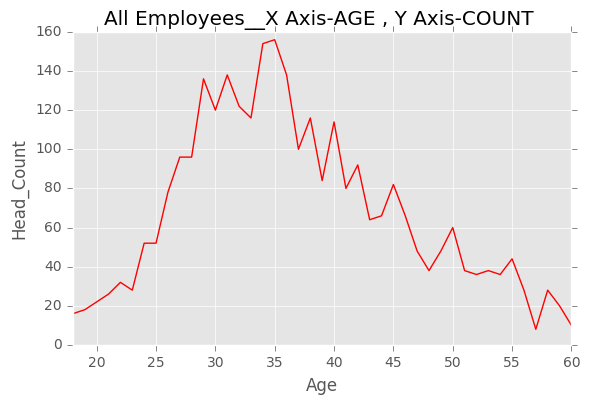

In [27]:
%matplotlib inline
# 
import pandas as pd
from pandas.tseries.resample import TimeGrouper
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

t0 = time()

df_c=h_df.groupby('Age')['EmployeeCount'].sum()

#df_c.head(10) # Not required
#
plt.figure(); df_c.plot(color='r',x_compat=True).set_ylabel('Head_Count');
plt.tight_layout()
plt.title('All Employees__X Axis-AGE , Y Axis-COUNT ')
plt.savefig("All_Emp_Age_Count.pdf", dpi=950)

t1 = time() - t0

print "_________________________________________________"
print("Task completed in {} seconds".format(round(t1, 4)))
print "_________________________________________________"


_________________________________________________
Task completed in 0.276 seconds
_________________________________________________


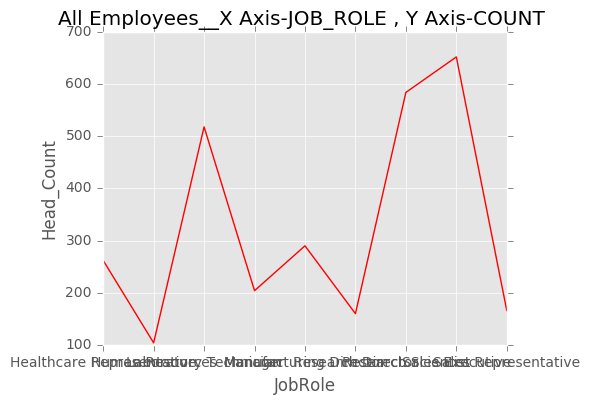

In [29]:
t0 = time()

df_d=h_df.groupby('JobRole')['EmployeeCount'].sum()
#
plt.figure(); df_d.plot(color='r',x_compat=True).set_ylabel('Head_Count');  

plt.tight_layout()
plt.title('All Employees__X Axis-JOB_ROLE , Y Axis-COUNT ')
plt.savefig("All_Emp_Age_Count.pdf", dpi=950)

t1 = time() - t0

print "_________________________________________________"
print("Task completed in {} seconds".format(round(t1, 4)))
print "_________________________________________________"

# Color Choices - color='r' , color='g' , color='b'
